<a href="https://colab.research.google.com/github/mrdobson/fun_stuff/blob/main/mj_channel_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# perform data load from github path 
url = 'https://raw.githubusercontent.com/mrdobson/fun_stuff/main/Channel%20Analytics%20and%20Revenue%20by%20day%20from%20Dec_1_2020%20to%20Jun_8_2021.csv'

df1 = pd.read_csv(url, header=None)

In [ ]:
print(df1.head(10))

                                                   0
0  Date,Ad Breaks (Minutes),Ad Time (Seconds) Per...
1  Tue Dec 01 2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
2  Wed Dec 02 2020,0,0,4.58,196,9,1,0,1,0,26,7,91...
3  Thu Dec 03 2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
4  Fri Dec 04 2020,0,0,3.29,254,9,0,0,0,0,27,5,61...
5  Sat Dec 05 2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
6  Sun Dec 06 2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
7  Mon Dec 07 2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
8  Tue Dec 08 2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
9  Wed Dec 09 2020,0,0,4.56,323,8,2,1,0,0.1,25,8,...


0      Average Viewers
1                    0
2                 4.58
3                    0
4                 3.29
            ...       
186              11.51
187                  0
188                  0
189                  0
190              15.42
Name: 3, Length: 191, dtype: object
[ 4.58  3.29  4.56  5.91  2.48  4.1   2.75  3.35  4.55  4.07  3.85  3.74
  4.17  8.64  6.1   6.17  5.55  6.17  6.07  5.74  9.65  6.62  6.16  3.74
  2.68  7.11  3.83  5.15  6.7   6.31  6.77  9.7   7.44  5.94  6.55  6.23
  4.65  7.32 10.84  6.61  7.06  7.67  8.21  5.84  7.85  4.5   4.26  9.05
  7.48 10.11  9.35  5.93  7.82  6.18  8.03  9.94  7.98  4.53 12.34 11.99
 13.16 14.62 14.14  8.09  8.27 13.8  13.98 11.51 15.42]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]


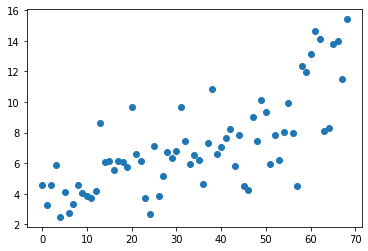

In [ ]:
print(df1.iloc[:, 3])

# store col 3 into array
data_x = df1.iloc[1:, 3].tolist()
 
# convert data_x to float vals
data_x = [float(i) for i in data_x]

# convert both data lists to np arrays
data_x = np.array(data_x)

# remove zeros test
data_x = np.delete(data_x, np.where(data_x==0))
#data_x[data_x==0]=['nan'] # <- does not like this in model

# generate y axis
data_y = list(range(len(data_x)))
data_y = np.array(data_y)

print(data_x)
print(data_y)
plt.scatter(data_y, data_x)

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())   

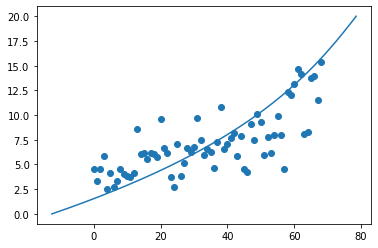

In [ ]:
xfit = np.linspace(0, 20, 1000)

poly_model.fit(data_x[:, np.newaxis], data_y)  #fit with the original x in 1 dimension
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(data_y, data_x)
plt.plot(yfit, xfit)

In [ ]:
|